# Part I - Ford GoBike System Data
## by Jerry Oscar

## Introduction

> I'm diving into a data analysis project on bike-sharing systems in the San Francisco Bay area. The data, from 2019, provides details about individual bike rides, including location and duration of each rental. Also, it offers information about the users, like birth year, user type, and gender. This will help me understand not just how the bike-sharing system is used, but also who the users are.  

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import requests

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# magic word
%matplotlib inline


### Loading in my dataset to describe its properties through the questions below.

In [2]:
# Load the dataset into a pandas DataFrame
fordgobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Print the number of rows and columns in the DataFrame
print("The DataFrame has {0} rows and {1} columns.".format(*fordgobike_df.shape))

# Print the data types of each column in the DataFrame
print("The data types of the columns in the DataFrame are:\n", fordgobike_df.dtypes)

# Print the first 5 rows of the DataFrame to get a glimpse of the data
print("The first 5 rows of the DataFrame are:\n", fordgobike_df.head(5))

The DataFrame has 183412 rows and 16 columns.
The data types of the columns in the DataFrame are:
 duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
The first 5 rows of the DataFrame are:
    duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3  

In [3]:
# Dropping any null values from the DataFrame
fordgobike_df = fordgobike_df.dropna()

# Display the number of null values after dropping to verify
print('After dropping null values:\n', fordgobike_df.isnull().sum())

After dropping null values:
 duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64


In [4]:
# Altering member_birth_year's data type to integer in the DataFrame
# Altering start_station_id's data type to integer in the DataFrame
# Altering end_station_id's data type to integer in the DataFrame
fordgobike_df = fordgobike_df.astype({'member_birth_year': 'int32', 'start_station_id': 'int32', 'end_station_id': 'int32'})

# Checking the data types of all columns in the DataFrame to ensure changes were implemented
fordgobike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int32
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int32
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int32
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
# Defining a dictionary for ordinal variables
ordinal_variables = {
    'bike_share_for_all_trip': ['Yes', 'No'],
    'member_gender': ['Male', 'Female', 'Other'],
    'user_type': ['Subscriber', 'Customer']
}

# Looping through the dictionary to convert data types in the DataFrame
for variable in ordinal_variables:
    ordered_variable = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_variables[variable])
    fordgobike_df[variable] = fordgobike_df[variable].astype(ordered_variable)

In [6]:
# Convert 'start_time' to datetime format
fordgobike_df['start_time'] = pd.to_datetime(fordgobike_df['start_time'], format='%Y-%m-%d')

# Convert 'start_time' to datetime format
fordgobike_df['start_time'] = pd.to_datetime(fordgobike_df['start_time'])

# Extract the day of the week from the 'start_time' column
fordgobike_df['start_day_of_week'] = fordgobike_df['start_time'].dt.day_name()

# Order the days of the week
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fordgobike_df['start_day_of_week'] = pd.Categorical(fordgobike_df['start_day_of_week'], categories=days_of_week, ordered=True)

# Display the first few rows of the DataFrame
print(fordgobike_df.head())

# Check the data types of 'start_time' and 'start_day_of_week'
print(fordgobike_df[['start_time', 'start_day_of_week']].dtypes)

   duration_sec              start_time                  end_time  \
0         52185 2019-02-28 17:32:10.145  2019-03-01 08:01:55.9750   
2         61854 2019-02-28 12:13:13.218  2019-03-01 05:24:08.1460   
3         36490 2019-02-28 17:54:26.010  2019-03-01 04:02:36.8420   
4          1585 2019-02-28 23:54:18.549  2019-03-01 00:20:44.0740   
5          1793 2019-02-28 23:49:58.632  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0                21  Montgomery St BART Station (Market St at 2nd St)   
2                86                           Market St at Dolores St   
3               375                           Grove St at Masonic Ave   
4                 7                               Frank H Ogawa Plaza   
5                93                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811              13   
2     

### What is the structure of your dataset?

> The dataset has more than 180,000 records with 16 features.
Integer Variables:

### Dataset Structure

**Integer Variables:**
- 'duration_sec': Duration in seconds
- 'start_station_id': Start station ID (converted from float)
- 'end_station_id': End station ID (converted from float)
- 'bike_id': Bike ID
- 'member_birth_year': Member's birth year (converted from float)

**Float Variables:**
- 'start_station_latitude': Latitude of the start station
- 'start_station_longitude': Longitude of the start station
- 'end_station_latitude': Latitude of the end station
- 'end_station_longitude': Longitude of the end station

**Object (String) Variables:**
- 'start_station_name': Name of the start station
- 'end_station_name': Name of the end station
- 'user_type': Type of user (categorized as 'Subscriber' or 'Customer')
- 'member_gender': Member's gender (categorized as 'Male', 'Female', or 'Other')
- 'bike_share_for_all_trip': Bike share for the whole trip (categorized as 'Yes' or 'No')

**Datetime Variables:**
- 'start_time': Start time of the ride
- 'end_time': End time of the ride

### What is/are the main feature(s) of interest in your dataset?

> The key features that pique my interest in this dataset are the popularity of bike rental stations, the average duration of rentals, the average age of renters, and the data comparison between subscribers and renters.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that I think will assist my investigation into the areas of interest include the start and end times, age of the users, user type, and the start and end stations.

## Univariate Exploration

## Histogram -  Which age group constitutes the majority of riders?

The most common age of riders is 31.
The average age of riders is 34.20.
The top 10 most common birth years of riders are:
 1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
1992     8245
1987     8010
1986     7953
1994     7654
1995     7420
Name: member_birth_year, dtype: int64


<AxesSubplot: xlabel='rider_age', ylabel='Count'>

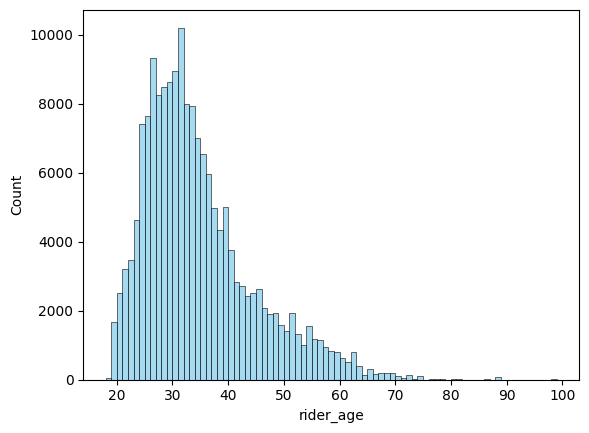

In [7]:
# Calculate the age of riders
fordgobike_df['rider_age'] = 2019 - fordgobike_df['member_birth_year']

# Find the most common age
most_common_age = fordgobike_df['rider_age'].mode()[0]

# Calculate the average age
average_age = fordgobike_df['rider_age'].mean()

# Find the top 10 most common birth years
top_10_birth_years = fordgobike_df['member_birth_year'].value_counts().nlargest(10)

# Print the results
print("The most common age of riders is {}.".format(most_common_age))
print("The average age of riders is {:.2f}.".format(average_age))
print("The top 10 most common birth years of riders are:\n", top_10_birth_years)

# Define bins for age
age_bins = np.arange(18, 100, 1)

# Plot a histogram of ages
sns.histplot(data=fordgobike_df, x='rider_age', bins=age_bins, color='skyblue')

## Observation
> Significant portion of the riders were born in the years spanning from 1986 to 1995, which corresponds to an approximate age range of 24 to 33 years old

## Bar Chart - What is the distribution of riders' genders in the dataset?

The total counts for each gender are as follows:
 Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64
The proportions for each gender are as follows:
 Male      0.745919
Female    0.233235
Other     0.020846
Name: member_gender, dtype: float64

The ratio of riders identifying as Male to those identifying as Female is 3.20.


<AxesSubplot: title={'center': 'Gender Distribution of Riders'}>

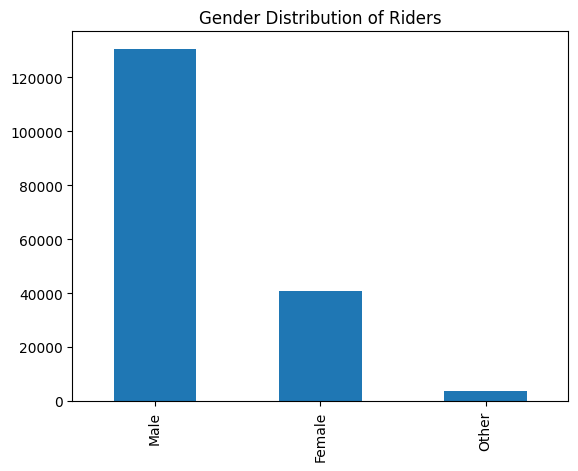

In [8]:
# Count the number of male and female riders
gender_counts = fordgobike_df['member_gender'].value_counts()

# Print the total counts for each gender
print("The total counts for each gender are as follows:\n", gender_counts)

# Calculate the ratio of male to female riders
male_to_female_ratio = gender_counts['Male'] / gender_counts['Female']

# Calculate the proportions
gender_proportions = gender_counts / gender_counts.sum()

# Print the proportions
print("The proportions for each gender are as follows:\n", gender_proportions)

# Print the ratio
print("\nThe ratio of riders identifying as Male to those identifying as Female is {:.2f}.".format(male_to_female_ratio))

# Bar plot
gender_counts.plot(kind='bar', title='Gender Distribution of Riders')

## Observation
> The bar chart reveals a clear majority of riders identifying as Male, with a count of approximately 130,500, which significantly surpasses the number of Female riders, which stands at approximately 41,000. A small segment of riders of approximately 3,700 identifies as 'Other'. Males constituting the largest proportion

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution depicted in the histogram reveals that a significant portion of the riders were approximate in the age range of 24 to 33 years as of 2019. The majority of bike riders identify as male, representing approximately 75% of the total, while female riders constitute around 23%, and riders who identify as other make up about 2%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the features I investigated, the distribution of riders' ages was somewhat unusual. While it was expected that the majority of riders would fall within the working age group, the specific concentration within the 24 to 33 year age range was noteworthy.
In terms of data operations, several steps were taken to tidy and adjust the data for effective analysis. Firstly, null values were removed from the DataFrame to ensure the integrity and accuracy of the results. Secondly, specific columns like 'start_station_id', 'end_station_id', and 'member_birth_year' were converted from float to integer data types for more precise data representation.
Additionally, rider age was calculated by subtracting the 'member_birth_year' from the year 2019, and a new column 'rider_age' was created to store this information. This was done to provide more contextually relevant data for the analysis, as understanding the age distribution of riders can offer valuable insights into usage patterns.
Lastly, the 'user_type', 'member_gender', and 'bike_share_for_all_trip' columns were converted to categorical data types. This was done to facilitate better data analysis and visualization, as these columns contain specific categories that were integral to the investigation.

## Bivariate Exploration

## Scatter plot - Is there a correlation between the age of a rider and the duration of their trip?

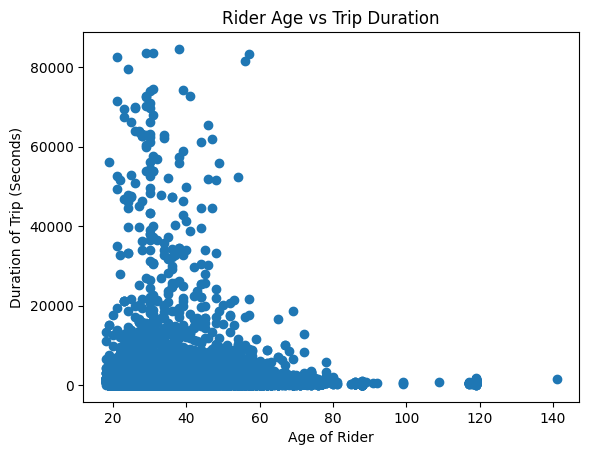

In [9]:
# Scatter plot of 'member_birth_year' against 'duration_sec'
fordgobike_df['rider_age'] = 2019 - fordgobike_df['member_birth_year']
plt.scatter(data = fordgobike_df, x = 'rider_age', y = 'duration_sec')
plt.xlabel('Age of Rider')
plt.ylabel('Duration of Trip (Seconds)')
plt.title('Rider Age vs Trip Duration')
plt.show()

## Observation
> The scatter plot indicates a higher density of data points for younger riders, suggesting that riders closer to age 20 tend to have longer trip durations. This implies a correlation where younger riders are associated with longer bike trips.       

## Box plot - Investigating Rider Age Distribution at Popular Stations

The top 10 start stations with the most trips are as follows:
 Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64


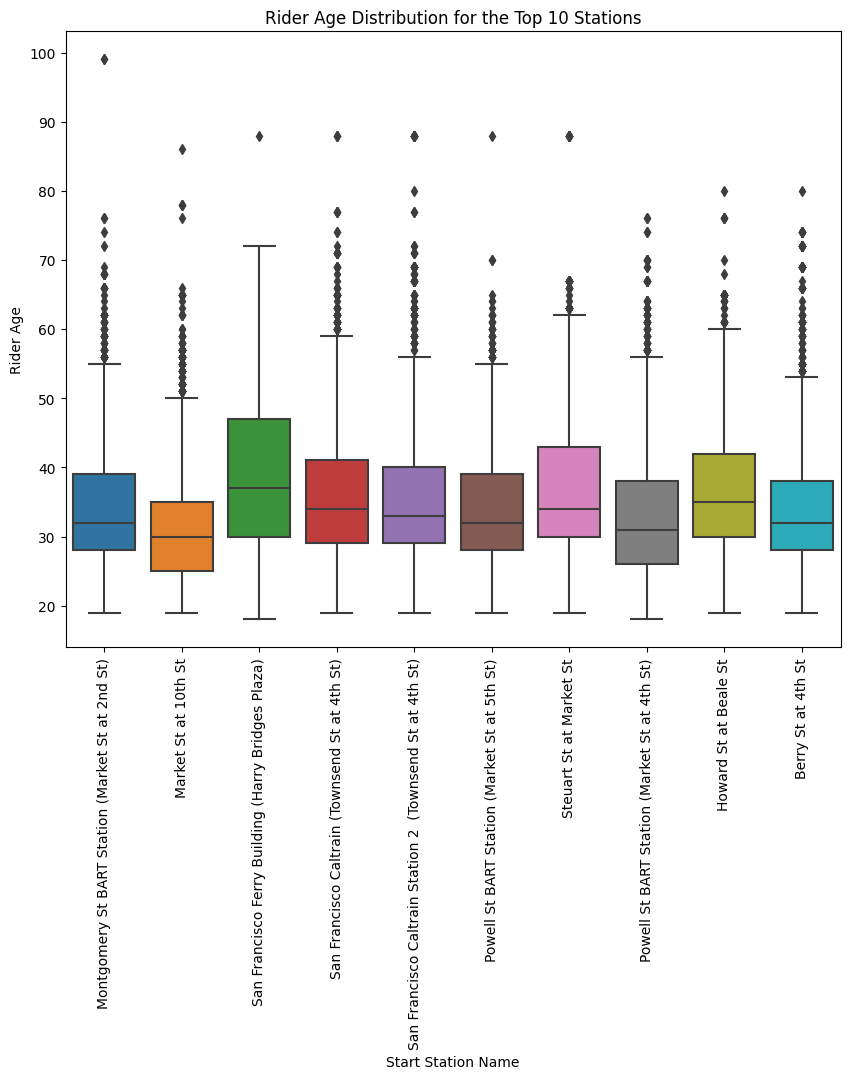

In [10]:
# Define the top stations
# Count the number of trips for each start station
trips_per_station = fordgobike_df['start_station_name'].value_counts()

# Get the top 10 start stations
top_10_stations = trips_per_station.nlargest(10)

# Print the top 10 stations
print("The top 10 start stations with the most trips are as follows:\n", top_10_stations)

top_stations_list = ['Market St at 10th St',
                     'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
                     'Berry St at 4th St',
                     'Montgomery St BART Station (Market St at 2nd St)',
                     'Powell St BART Station (Market St at 4th St)',
                     'San Francisco Caltrain (Townsend St at 4th St)',
                     'San Francisco Ferry Building (Harry Bridges Plaza)',
                     'Howard St at Beale St',
                     'Steuart St at Market St',
                     'Powell St BART Station (Market St at 5th St)']

# Filter the DataFrame to only include trips from the top stations and riders with age <= 100
filtered_df = fordgobike_df[(fordgobike_df['start_station_name'].isin(top_stations_list)) & (fordgobike_df['rider_age'] <= 100)]

# Create a boxplot for the age of riders from each of the top stations
plt.figure(figsize=[10, 8])
sns.boxplot(data=filtered_df, x='start_station_name', y='rider_age')
plt.xticks(rotation=90)
plt.title('Rider Age Distribution for the Top 10 Stations')
plt.xlabel('Start Station Name')
plt.ylabel('Rider Age')
plt.show()

## Observation
> Among the top 10 stations, "Market St at 10th St" records the youngest average rider age at approximately 31 years, while "San Francisco Ferry Building (Harry Bridges Plaza)" hosts the oldest average rider age, around 39 years. The average rider ages across all top stations are within the range of about 31 to 39 years. In terms of median age, "Market St at 10th St" and "San Francisco Ferry Building (Harry Bridges Plaza)" stand out with median ages of 31 and 37 years, respectively.

## Clustered bar chart - How does the average trip duration vary between different user types and genders?

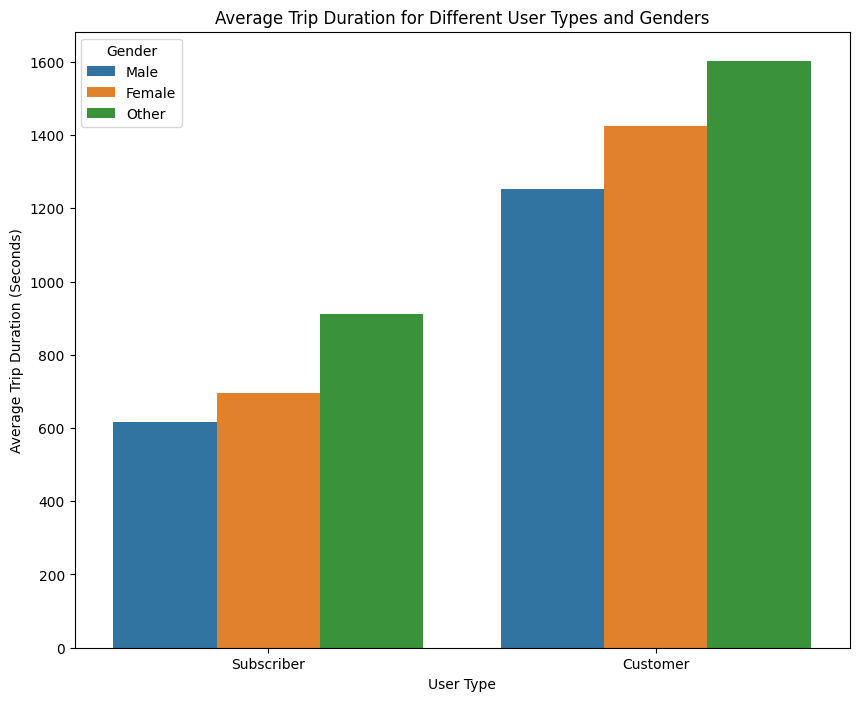

In [11]:
# Calculate the average trip duration for each combination of user type and gender
average_durations = fordgobike_df.groupby(['user_type', 'member_gender'])['duration_sec'].mean().reset_index()

# Create a clustered bar chart
plt.figure(figsize=[10, 8])
sns.barplot(data = average_durations, x = 'user_type', y = 'duration_sec', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (Seconds)')
plt.title('Average Trip Duration for Different User Types and Genders')
plt.legend(title = 'Gender')
plt.show()

## Observation
> The clustered bar chart shows that on average, 'Customer' users tend to have longer trip durations compared to 'Subscriber' users, regardless of gender. Within each user type, 'Other' gender users have the longest average trip durations, followed by 'Female' and then 'Male' users. Specifically, 'Subscriber' users identifying as 'Male', 'Female', and 'Other' have average trip durations of approximately 610, 696, and 912 seconds, respectively. On the other hand, 'Customer' users identifying as 'Male', 'Female', and 'Other' have noticeably longer average trip durations, approximately 1254, 1424, and 1600 seconds, respectively.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Bivariate Exploration uncovered several relationships between user characteristics, trip duration, and rider age. A higher density of younger riders was observed to associate with longer trip durations, implying that younger riders tend to take longer trips. Furthermore, the average and median ages of riders varied across different stations, suggesting that different stations attract different age demographics. The user type and gender were also found to influence trip duration, with 'Customer' users generally having longer trips and 'Other' gender users tending to have the longest trips within each user type.tended to have the longest average trip durations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  Yes, the exploration revealed interesting relationships between rider age, trip duration, user type, and gender. The correlation between rider age and trip duration suggests that these two features are not independent, and younger riders tend to take longer trips. The variation in rider age across different stations suggests that the station's location may be more attractive to certain age demographics. Interestingly, despite 'Subscriber' users generally taking shorter trips, 'Other' gender users within this user type tend to have longer trips, indicating an intricate interplay between these variables.

## Multivariate Exploration

## Facet plot - How does the trip duration vary by user type and gender across different days of the week?

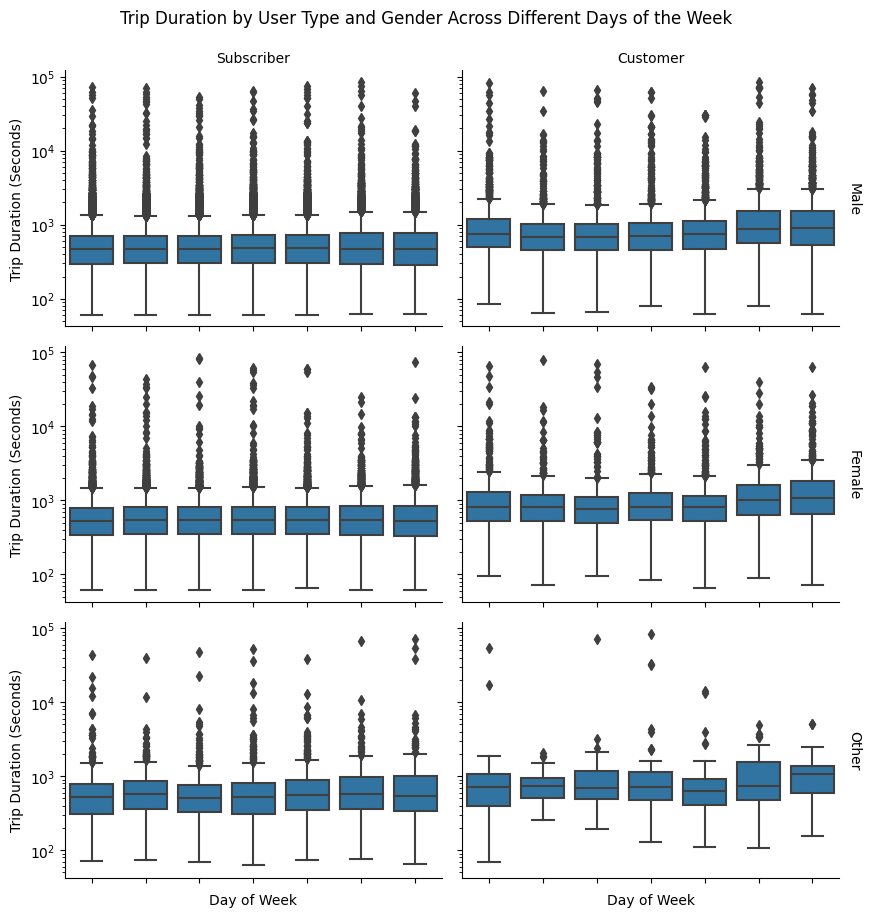

In [12]:
# Extract the day of the week from the 'start_time' column
fordgobike_df['start_day_of_week'] = fordgobike_df['start_time'].dt.day_name()

# Order the days of the week
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fordgobike_df['start_day_of_week'] = pd.Categorical(fordgobike_df['start_day_of_week'], categories=days_of_week, ordered=True)

# Create a FacetGrid object with 'user_type' as columns and 'member_gender' as rows
g = sns.FacetGrid(data=fordgobike_df, col='user_type', row='member_gender', margin_titles=True, aspect=1.5)

# Map a boxplot onto each facet, specifying the order of the x-axis
g.map(sns.boxplot, 'start_day_of_week', 'duration_sec', order=days_of_week)

# Set the titles for the facets
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Set the labels for the x-axis and y-axis
g.set_axis_labels("Day of Week", "Trip Duration (Seconds)")

# Set the x-axis labels to be vertical
g.set_xticklabels(rotation=90)

# Set the y-axis to be on a log scale
g.set(yscale='log')

# Add a title for the entire plot
g.fig.suptitle('Trip Duration by User Type and Gender Across Different Days of the Week', y=1.03)

# Display the plot
plt.show()

## Observation
> The Facet plot shows that the average trip durations show a notable difference across user types, genders, and days of the week. 'Subscriber' users generally have shorter trips compared to 'Customer' users, and this pattern is consistent across all days of the week. Within each user type, 'Other' gender users tend to have the longest trips, particularly on the weekends. The median trip durations reflect similar patterns, but the disparities are less pronounced. Interestingly, for 'Customer' users identifying as 'Other', the median trip duration is highest on Sundays, suggesting that these users tend to take longer trips on the weekends

## Plot Matrix -  Does the user's age or trip duration vary based on their user type, gender, or whether they shared the bike for the entire trip?

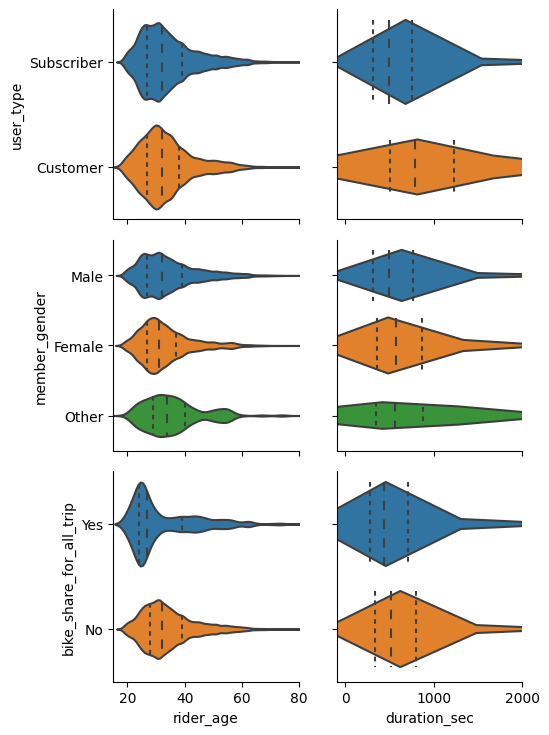

In [13]:
# Filter the DataFrame to only include riders with age less than or equal to 90
filtered_df = fordgobike_df[fordgobike_df['rider_age'] <= 90]

# Create a PairGrid object with 'user_type', 'member_gender', and 'bike_share_for_all_trip' as y_vars and 'rider_age' and 'duration_sec' as x_vars
grid = sns.PairGrid(data=filtered_df, x_vars=['rider_age', 'duration_sec'],
                y_vars=['user_type', 'member_gender', 'bike_share_for_all_trip'])

# Map a violinplot onto each facet
grid.map(sns.violinplot, inner='quartile')

# Set the x-axis limits for 'rider_age' and 'duration_sec'
grid.axes[0,0].set_xlim(15, 80)
grid.axes[1,1].set_xlim(-100,2000)

# Display the plots
plt.show()

## Observation
> Looking at the Plot Matrix you can see that statistically, the rider age and trip duration vary across different combinations of user type, gender, and whether they shared the bike for the entire trip. 'Subscriber' users, regardless of gender, tend to be younger on average compared to 'Customer' users. Specifically, 'Subscriber' users who identify as 'Male' and share the bike for the entire trip have the lowest average age at around 32 years. 'Customer' users who identify as 'Other' have the highest average age at about 35 years. In terms of trip duration, 'Customer' users generally have longer trips compared to 'Subscriber' users, regardless of gender. 'Customer' users identifying as 'Other' have the longest average trip duration at approximately 1600 seconds, while 'Subscriber' users identifying as 'Male' who share the bike for the entire trip have the shortest average trip duration at about 650 seconds.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The Multivariate Exploration phase shed light on the complex interactions between user type, gender, days of the week, rider age, and trip duration. One key observation was that 'Subscriber' users generally took shorter trips than 'Customer' users, a trend consistent across all days of the week. This pattern was further refined by gender, with 'Other' gender users within each user type tending to have the longest trips, particularly on weekends.

### Were there any interesting or surprising interactions between features?

> Yes, an interesting relationship emerged from the exploration. While 'Subscriber' users were generally younger and had shorter trips, those who identified as 'Male' and shared the bike for the entire trip were the youngest on average. Conversely, 'Customer' users who identified as 'Other' were older on average but had the longest average trip durations. These findings highlight the intricate interplay between user type, gender, rider age, and trip duration, revealing that these factors are interconnected and jointly influence the usage patterns of the bike-sharing system.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> From our univariate exploration, we observed that a significant number of riders were born between 1986 and 1995, and the majority of our bike riders are male. This demographic makeup has implications for marketing and outreach strategies.

> Our bivariate exploration revealed that younger riders generally have longer trip durations, indicating a possible correlation between age and trip duration. Additionally, we found that different stations have different average rider ages, suggesting that location plays a role in the age distribution of riders. We also discovered that 'Customer' users tend to have longer trip durations than 'Subscriber' users, and within each user type, riders identifying as 'Other' have the longest average trip duration.

> Our bivariate exploration revealed that younger riders generally have longer trip durations, indicating a possible correlation between age and trip duration. Additionally, we found that different stations have different average rider ages, suggesting that location plays a role in the age distribution of riders. We also discovered that 'Customer' users tend to have longer trip durations than 'Subscriber' users, and within each user type, riders identifying as 'Other' have the longest average trip duration.

> In conclusion, the data exploration revealed complex and interesting patterns in bike-sharing usage. These insights can inform strategies to improve user experiences and service efficiency. For example, services could consider tailoring their marketing and operational strategies to better serve their largest user demographics and improve service at the most popular stations. Further research could delve deeper into the reasons behind these patterns, providing even more nuanced insights into the dynamics of bike-sharing usage.